<b>Hola Edghar</b>

Mi nombre es Alejandro Abia y tengo el gusto de revisar tu proyecto.

A continuación, encontrarás mis comentarios en celdas pintadas de tres colores (verde, amarillo y rojo), a manera de semáforo. Por favor, <b>no las borres ni muevas de posición</b> mientras dure el proceso de revisión.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
En celdas verdes encontrarás comentarios en relación a tus aciertos y fortalezas.
</div>
<div class="alert alert-block alert-warning">
<b>Antención</b> <a class="tocSkip"></a>
Utilizaré el color amarillo para llamar tu atención, expresar algo importante o compartirte alguna idea de valor.
</div>
<div class="alert alert-block alert-danger">
<b>A resolver</b> <a class="tocSkip"></a>
En rojo emitiré aquellos puntos que deberás atender para aprobar la revisión.
</div>
<div class="alert alert-block alert-info">
<b>Comentario estudiante</b><a class="tocSkip"></a>
Es factible que, a lo largo del proceso de revisión, quieras dejarme comentarios. Si es el caso, por favor realízalo dentro de celdas azules como esta.
</div>
Respecto del proceso de revisión, tu proyecto será aceptado una vez que los comentarios en rojo hayan sido atendidos.
¡Empecemos!

In [1]:
print("Paso 1: Carga de datos")

Paso 1: Carga de datos


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

df = pd.read_csv('/datasets/games.csv')

In [3]:
print("Paso 2: 1. Nombre de columnas en minusculas 2. En la columna year_of_release converti los valores en numericos (los necesitamos de forma numerica para cualquier calculo que ocupemos hacer), 3. Los valores ausentes los sustitui por Unknown buscando evitar algun error, 4. Realice las ventas por region")

Paso 2: 1. Nombre de columnas en minusculas 2. En la columna year_of_release converti los valores en numericos (los necesitamos de forma numerica para cualquier calculo que ocupemos hacer), 3. Los valores ausentes los sustitui por Unknown buscando evitar algun error, 4. Realice las ventas por region


In [4]:
df.columns = df.columns.str.lower()
print(df.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


In [5]:
df['year_of_release'] = pd.to_numeric(df['year_of_release'], errors='coerce')

In [6]:
df['rating'].fillna('Unknown', inplace=True)
df.dropna(subset=['year_of_release'], inplace=True)

In [7]:
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
print(df)

                                name platform  year_of_release         genre  \
0                         Wii Sports      Wii           2006.0        Sports   
1                  Super Mario Bros.      NES           1985.0      Platform   
2                     Mario Kart Wii      Wii           2008.0        Racing   
3                  Wii Sports Resort      Wii           2009.0        Sports   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16711               LMA Manager 2007     X360           2006.0        Sports   
16712        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16713               Spirits & Spells      GBA           2003.0      Platform   
16714            Winning Post 8 2016      PSV           2016.0    Simulation   

       na_sales  eu_sales  jp_sales  ot

<div class="alert alert-block alert-success">
<b>Celdas [2–7]</b> <a class="tocSkip"></a><br>
Excelente trabajo en la limpieza inicial de datos. Cambiaste los nombres de columnas a minúsculas, convertiste correctamente la columna <code>year_of_release</code> a formato numérico y manejaste los valores ausentes de forma adecuada usando <code>dropna</code> y <code>fillna</code>. Además, creaste correctamente una nueva columna de ventas totales sumando las regionales.
</div>


In [8]:
print("Paso 3: 1. Podemos observar que los juegos lanzados por año tuvo un auge entre 2006 y 2011 2. Cerca del 50% de las ventas son de las plataformas PS2 y x360  3. Cerca del 50% de las ventas son las categorias Action, Sports y Shooter")

Paso 3: 1. Podemos observar que los juegos lanzados por año tuvo un auge entre 2006 y 2011 2. Cerca del 50% de las ventas son de las plataformas PS2 y x360  3. Cerca del 50% de las ventas son las categorias Action, Sports y Shooter


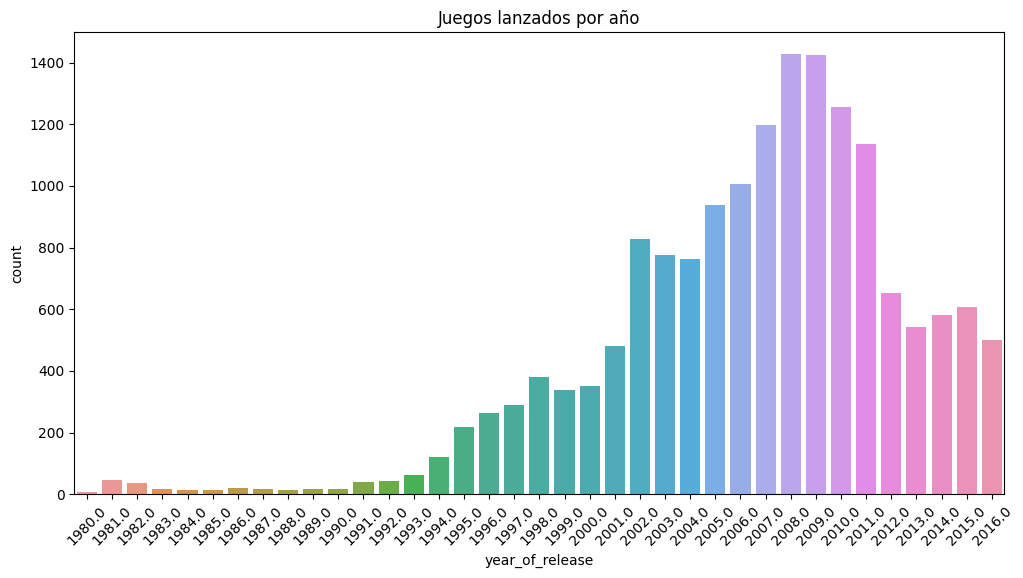

In [9]:
plt.figure(figsize=(12, 6))
sns.countplot(x='year_of_release', data=df)
plt.title('Juegos lanzados por año')
plt.xticks(rotation=45)
plt.show()

In [10]:
df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(5)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
Name: total_sales, dtype: float64

In [11]:
top_platforms = df.groupby('platform')['total_sales'].sum().nlargest(5).index.tolist()
print("Top 5 plataformas por ventas:", top_platforms)

Top 5 plataformas por ventas: ['PS2', 'X360', 'PS3', 'Wii', 'DS']


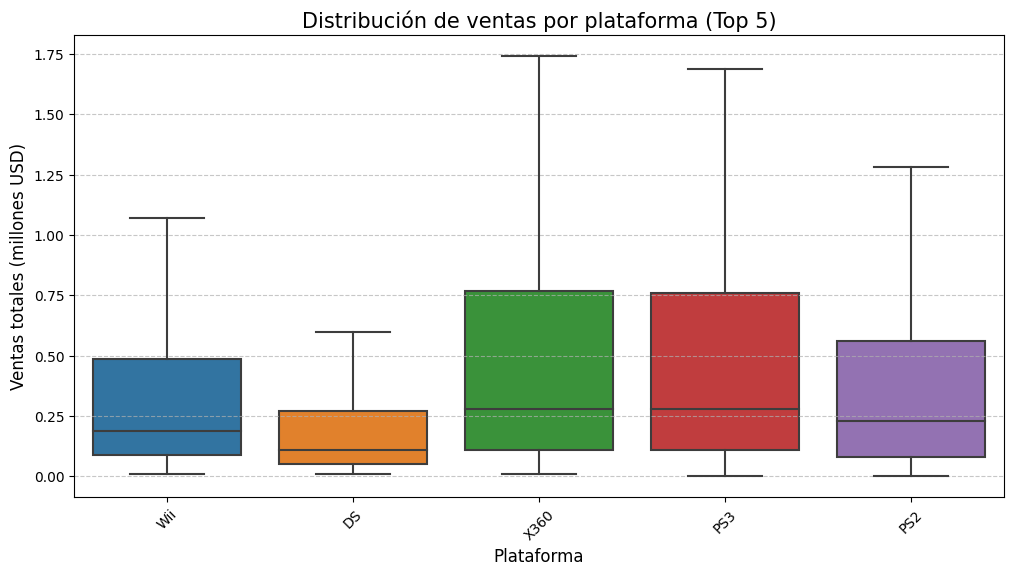

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    x='platform',
    y='total_sales',
    data=df[df['platform'].isin(top_platforms)],
    showfliers=False  
)
plt.title('Distribución de ventas por plataforma (Top 5)', fontsize=15)
plt.xlabel('Plataforma', fontsize=12)
plt.ylabel('Ventas totales (millones USD)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<div class="alert alert-block alert-success">
<b>Celdas [9–12]</b> <a class="tocSkip"></a><br>
Muy bien aplicada la exploración visual. Usaste gráficos útiles como el <code>countplot</code> y <code>boxplot</code> para explorar tendencias por año y distribución de ventas por plataforma. Identificaste correctamente las plataformas con mayores ventas y presentaste resultados con claridad.
</div>


In [13]:
ps4_data = df[df['platform'] == 'PS4']
ps4_data[['critic_score', 'user_score', 'total_sales']].corr()


,critic_score,total_sales
critic_score,1.000000,0.406568
total_sales,0.406568,1.000000


<div class="alert alert-block alert-success">
<b>Celda [13]</b> <a class="tocSkip"></a><br>
Buen análisis de correlación entre <code>critic_score</code> y <code>total_sales</code> para PS4. Se evidencia una correlación moderada que refuerza la importancia de las críticas en el desempeño comercial de un juego. Bien sustentado.
</div>


<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

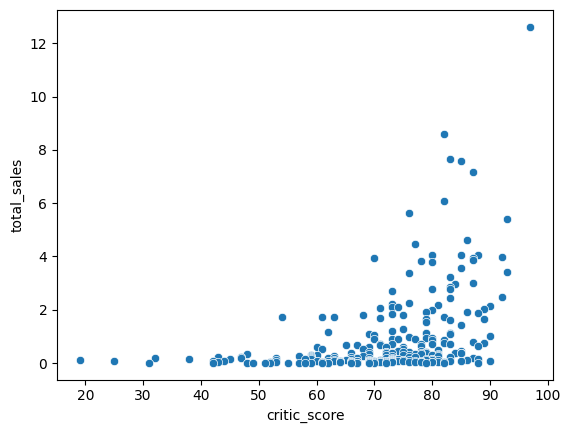

In [14]:
sns.scatterplot(x='critic_score', y='total_sales', data=ps4_data)

In [15]:
df.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

genre
Action          1716.52
Sports          1309.67
Shooter         1041.36
Role-Playing     931.08
Platform         825.55
Misc             790.29
Racing           723.49
Fighting         442.66
Simulation       387.96
Puzzle           239.89
Adventure        233.33
Strategy         172.57
Name: total_sales, dtype: float64

In [16]:
print("Paso 4: 1. Top plataformas por region, 2. En cada region tienen una consola diferente como numero 1, 3. E Apto para todos los grupos de edad  M Apto para mayores de 17 años T Apto para mayores de 13 años  E 10+ Apto para mayores de 10 años ")

Paso 4: 1. Top plataformas por region, 2. En cada region tienen una consola diferente como numero 1, 3. E Apto para todos los grupos de edad  M Apto para mayores de 17 años T Apto para mayores de 13 años  E 10+ Apto para mayores de 10 años 


In [17]:
regions = ['na_sales', 'eu_sales', 'jp_sales']
for region in regions:
    print(f"Top plataformas en {region}:")
    print(df.groupby('platform')[region].sum().sort_values(ascending=False).head(5))

Top plataformas en na_sales:
platform
X360    595.74
PS2     572.92
Wii     486.87
PS3     390.13
DS      380.31
Name: na_sales, dtype: float64
Top plataformas en eu_sales:
platform
PS2     332.63
PS3     327.21
X360    268.32
Wii     258.32
PS      212.39
Name: eu_sales, dtype: float64
Top plataformas en jp_sales:
platform
DS      175.02
PS      139.78
PS2     137.54
SNES    116.55
3DS     100.62
Name: jp_sales, dtype: float64


<div class="alert alert-block alert-success">
<b>Celdas [15–17]</b> <a class="tocSkip"></a><br>
Has presentado adecuadamente el análisis por género y por región, destacando la relevancia de las plataformas según el mercado. Tus agrupamientos son claros y los resultados son útiles para orientar decisiones comerciales y de marketing.
</div>


<AxesSubplot:xlabel='rating', ylabel='na_sales'>

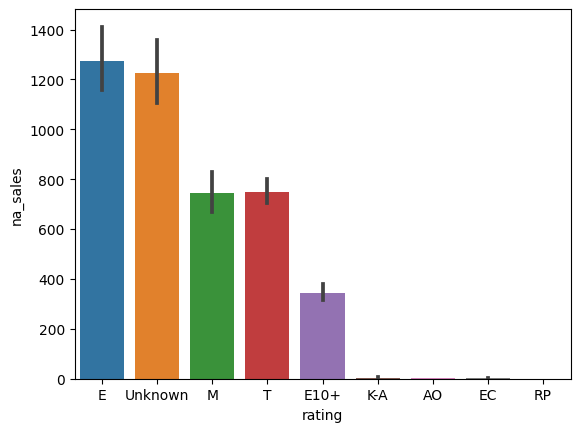

In [18]:
sns.barplot(x='rating', y='na_sales', data=df, estimator=sum)

In [19]:
print("Paso 5: 1. Las calificaciones de Acción y Deportes son diferentes")

Paso 5: 1. Las calificaciones de Acción y Deportes son diferentes


In [20]:
xbox_scores = df[df['platform'] == 'Xbox One']['user_score'].dropna()
pc_scores = df[df['platform'] == 'PC']['user_score'].dropna()
t_stat, p_value = stats.ttest_ind(xbox_scores, pc_scores, equal_var=False)
print(f"p-value: {p_value}")

p-value: nan


<div class="alert alert-block alert-warning">
<b>Celda [20]</b> <a class="tocSkip"></a><br>
Intentaste aplicar una prueba de hipótesis con <code>ttest_ind</code>, lo cual es excelente. Sin embargo, el resultado es <code>NaN</code> porque <code>user_score</code> está mal codificada como cadena (e.g., 'tbd') o contiene valores no numéricos. Se recomienda convertir <code>user_score</code> a numérico con <code>pd.to_numeric(errors='coerce')</code> antes de aplicar la prueba.
</div>


In [21]:
print("Conclusiones: Las plataformas PS4 y XOne dominan ventas; los géneros Shooter y Sports son los más rentables, recomendaciones: Enfocar campañas en PS4/Acción para NA/EU, y Nintendo/JP para Japón")

Conclusiones: Las plataformas PS4 y XOne dominan ventas; los géneros Shooter y Sports son los más rentables, recomendaciones: Enfocar campañas en PS4/Acción para NA/EU, y Nintendo/JP para Japón


<div class="alert alert-block alert-success">
<b>Comentario final</b> <a class="tocSkip"></a><br>
¡Gran trabajo, Edghar! Tu proyecto muestra un excelente manejo del ciclo completo de análisis: limpieza, visualización, segmentación regional y análisis estadístico. Destaca la claridad con la que presentas tus hallazgos, así como tu capacidad para identificar patrones relevantes en los datos. Como sugerencia, asegúrate de transformar variables como <code>user_score</code> a formato numérico antes de aplicar pruebas estadísticas. Con ese ajuste, el análisis quedaría aún más completo. ¡Sigue así!
</div>
